## This is my jupyter notebook for my first Machine Learning Project in R

### Fred Meckler, July 2023

#### First, Load in the caret package

In [3]:
library(caret)
library(kernlab)
library(randomForest)

#### Load in the the example iris dataset. From UCI machine learning repository. 

In [4]:
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header= TRUE, stringsAsFactors=TRUE)

#### Create a valiadation data set 

In [5]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$variety, p=0.80, list = FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

#### Summarize the dataset

In [6]:
# Find the dimensions of the data
dim(dataset)

[1] 120   5

In [7]:
# list types for each attribute
sapply(dataset, class)

sepal.length  sepal.width petal.length  petal.width      variety 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [8]:
# look at the first five rows of the data
head(dataset)

,sepal.length,sepal.width,petal.length,petal.width,variety
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa
6,5.4,3.9,1.7,0.4,Setosa
7,4.6,3.4,1.4,0.3,Setosa


In [8]:
# list the levels for the class
levels(dataset$variety)

[1] "Setosa"     "Versicolor" "Virginica"

In [9]:
# summarize the class distribution
percentage <- prop.table(table(dataset$variety)) * 100
cbind(freq=table(dataset$variety), percentage=percentage)

,freq,percentage
Setosa,40,33.33333
Versicolor,40,33.33333
Virginica,40,33.33333


In [10]:
# summarize attribute distributions
summary(dataset)

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.826   Mean   :3.034   Mean   :3.759   Mean   :1.203  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       variety  
 Setosa    :40  
 Versicolor:40  
 Virginica :40  
                
                
                

#### Visualize the data

In [11]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

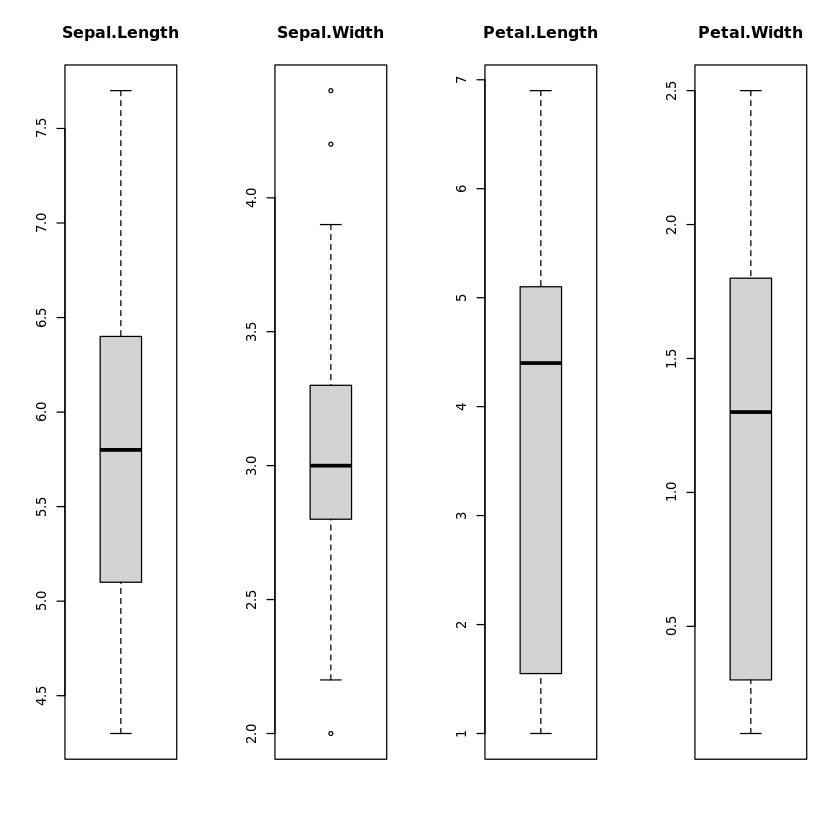

In [12]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

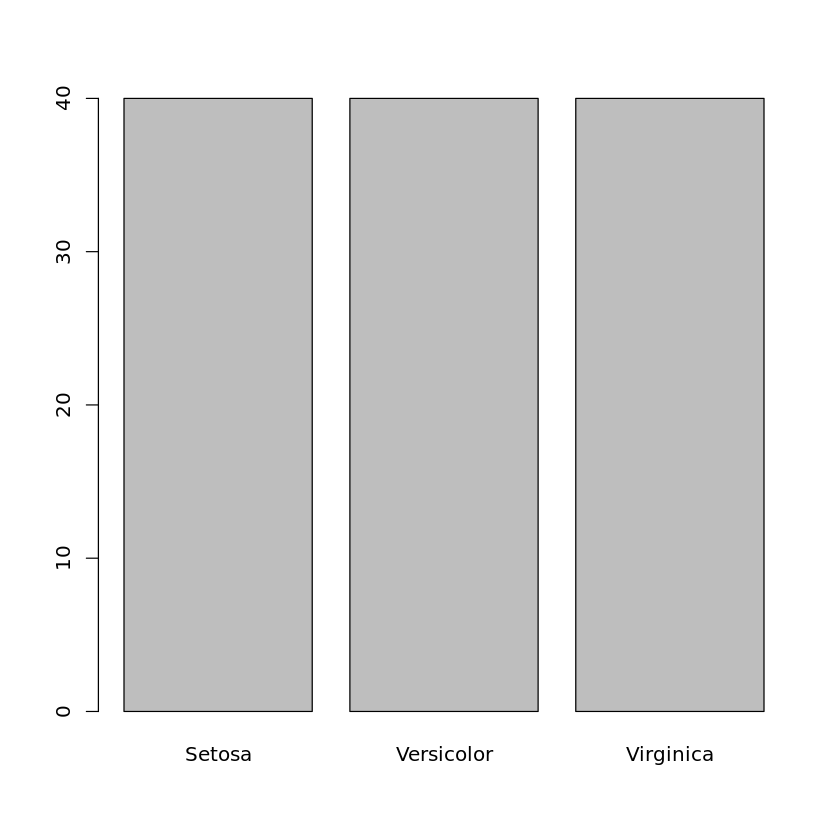

In [13]:
# barplot for class breakdown
plot(y)

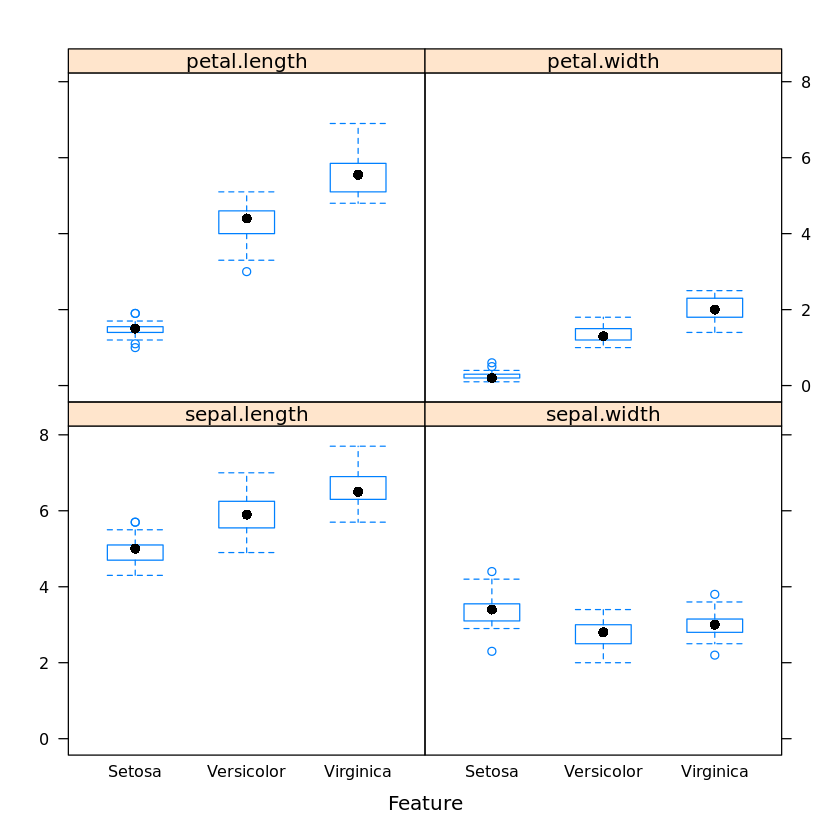

In [14]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="box")

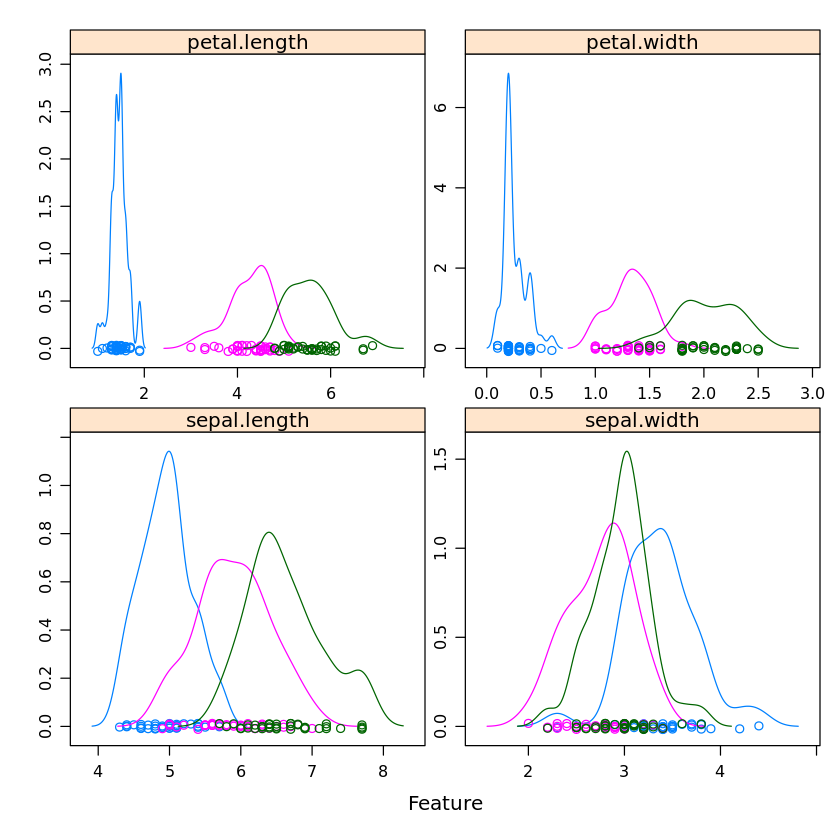

In [15]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

#### Evaluate a few different models

##### Test Harness

In [16]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

##### Build Models

In [17]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(variety~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(variety~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(variety~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(variety~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(variety~., data=dataset, method="rf", metric=metric, trControl=control)

##### Summarize Results of Models

In [19]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9750000       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
knn  0.8333333 1.0000000 1.0000000 0.9833333       1    1    0
svm  0.8333333 0.9166667 1.0000000 0.9583333       1    1    0
rf   0.8333333 0.9166667 1.0000000 0.9583333       1    1    0

Kappa 
     Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.75   1.000 1.0000 0.9625       1    1    0
cart 0.75   0.875 0.9375 0.9125       1    1    0
knn  0.75   1.000 1.0000 0.9750       1    1    0
svm  0.75   0.875 1.0000 0.9375       1    1    0
rf   0.75   0.875 1.0000 0.9375       1    1    0


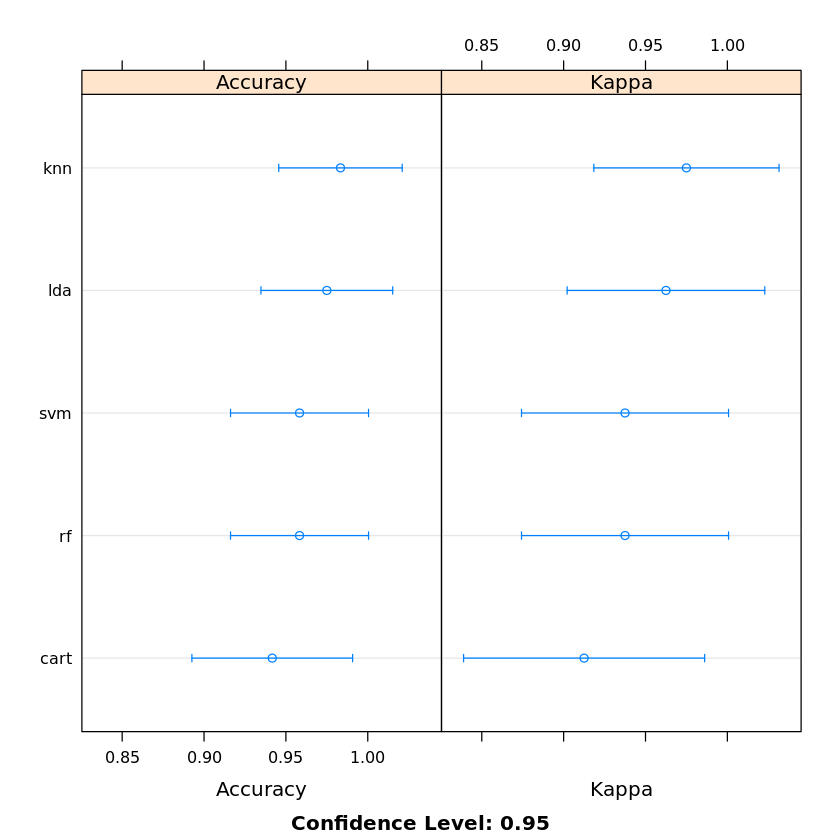

In [20]:
# compare accuracy of models
dotplot(results)

In [21]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Setosa', 'Versicolor', 'Virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



In [23]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$variety)

Confusion Matrix and Statistics

            Reference
Prediction   Setosa Versicolor Virginica
  Setosa         10          0         0
  Versicolor      0         10         0
  Virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Setosa Class: Versicolor Class: Virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            